#Stock Project

In [ ]:
#Importing dataset
import yfinance as yfn
stk = 'RELIANCE.NS'
stkdata =  yfn.download(stk,start = "2016-01-01",end = "2024-01-01")
print(stkdata.head())
print(stkdata.tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2016-01-01  213.729111  214.476371  212.224051  212.560838     5416562
2016-01-04  209.508575  213.402788  207.698289  211.550403    30170947
2016-01-05  211.581985  212.602899  209.866434  210.561072    14946239
2016-01-06  217.275970  218.581063  210.582130  212.097714    26759864
2016-01-07  213.287033  216.391873  212.192447  214.928912    19739943
Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2023-12-22  1273.848755  1281.720070  1265.207538  1271.142214    16541784
2023-12-26  1280.304810  1287.207745  1272.681682  1275.313779     7465664
2023-12-27  1284.675049  1291.155810  1277.846558  1282.2

In [ ]:
#check for missing values
print(stkdata.isnull().sum())
#fill missing values using forward fill
stkdata = stkdata.fillna(method = 'ffill')
#calculate 30 day moving average
stkdata['SMA_30'] =stkdata['Close'].rolling(window=30).mean()
#calculate the daily returns
stkdata['Returns']=stkdata['Close'].pct_change()
#drop rows with nan by rolling
stkdata = stkdata.dropna()

Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64


<ipython-input-3-c45a03168611>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stkdata = stkdata.fillna(method = 'ffill')


In [ ]:
print(stkdata.shape)  # Check the number of rows and columns remaining


(1946, 7)


In [ ]:
stkdata.head()

Price,Close,High,Low,Open,Volume,SMA_30,Returns
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2016-02-12,190.826904,196.584027,186.943216,196.584027,29319458,211.718127,-0.019469
2016-02-15,199.288925,200.257216,193.237113,193.237113,19283523,211.236787,0.044344
2016-02-16,195.878845,201.657003,195.131571,200.204567,13024856,210.782463,-0.017111
2016-02-17,200.520340,201.541254,192.900307,196.836619,15442221,210.413742,0.023696
2016-02-18,197.889130,203.909368,197.026085,202.698997,14433087,209.767514,-0.013122


In [ ]:
stkdata.tail()

Price,Close,High,Low,Open,Volume,SMA_30,Returns
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2023-12-22,1273.848755,1281.720070,1265.207538,1271.142214,16541784,1203.937374,0.000976
2023-12-26,1280.304810,1287.207745,1272.681682,1275.313779,7465664,1208.365548,0.005068
2023-12-27,1284.675049,1291.155810,1277.846558,1282.266405,9204156,1212.867391,0.003413
2023-12-28,1293.961792,1297.164951,1284.675069,1286.140066,12302636,1217.683752,0.007229
2023-12-29,1283.731323,1298.158085,1280.925483,1296.717943,10864584,1221.466321,-0.007906


# Data Visualization

##Plot

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2015-01-01  184.575638  185.427945  183.692150  184.243041     2963643
2015-01-02  184.087112  186.269848  183.827271  184.617202     7331366
2015-01-05  182.070679  185.199263  181.706887  183.972771    10103941
2015-01-06  173.807495  181.478228  172.955188  180.854595    18627980
2015-01-07  177.590912  178.526368  173.994613  174.015400    20720312


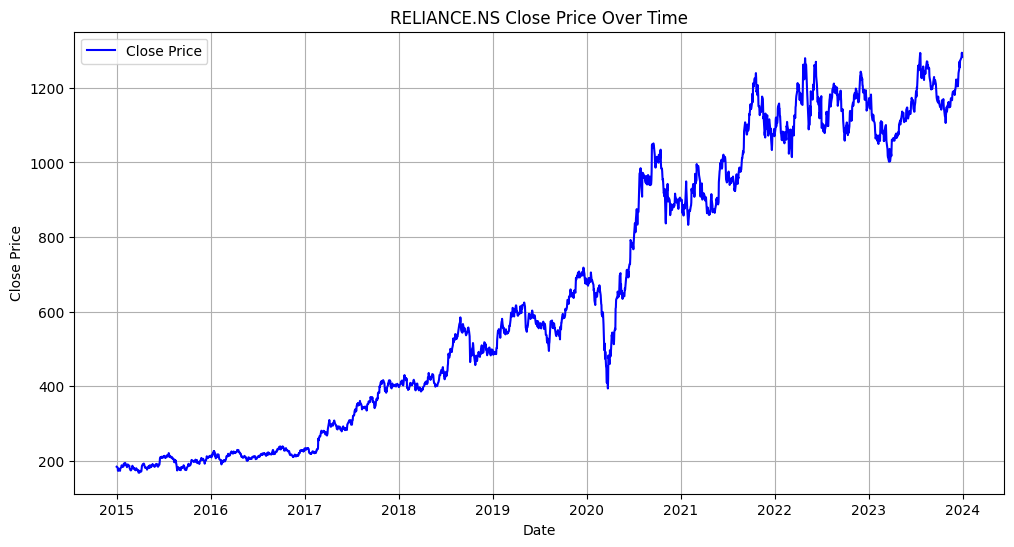

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
try:
    ticker = "RELIANCE.NS"  # Change to RELIANCE.BO for BSE
    stock_data = yf.download(ticker, start="2015-01-01", end="2023-12-31")

    if stock_data.empty:
        raise ValueError("No data fetched. Check the ticker symbol or date range.")

    print(stock_data.head())

    # Visualization (Close Price)
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.title(f'{ticker} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

except ValueError as ve:
    print(f"Value Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")


## Histogram: Distribution of Closing Prices

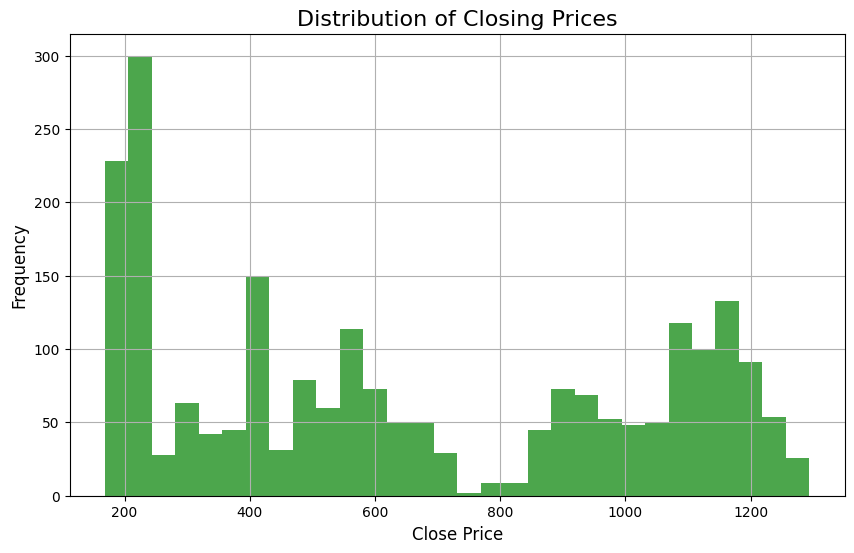

In [ ]:
# Histogram for Close Prices
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Closing Prices', fontsize=16)
plt.xlabel('Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()


##Basic Bar Graph for Average Monthly Closing Prices

<Figure size 1000x600 with 0 Axes>

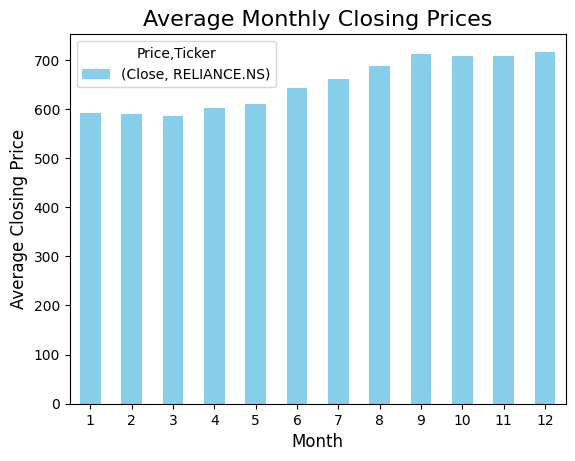

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is the index and is of datetime type
if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)

# Add a 'Month' column for grouping
stock_data['Month'] = stock_data.index.month

# Check if 'Close' column exists and calculate the average closing price for each month
if 'Close' in stock_data.columns:
    # Calculate average closing price per month
    monthly_avg_close = stock_data.groupby('Month')['Close'].mean()

    # Plot the Bar Graph
    plt.figure(figsize=(10, 6))
    monthly_avg_close.plot(kind='bar', color='skyblue')
    plt.title('Average Monthly Closing Prices', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Closing Price', fontsize=12)
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.show()
else:
    print("The 'Close' column is missing from the dataset.")


## Histogram (Distribution of Closing Prices)

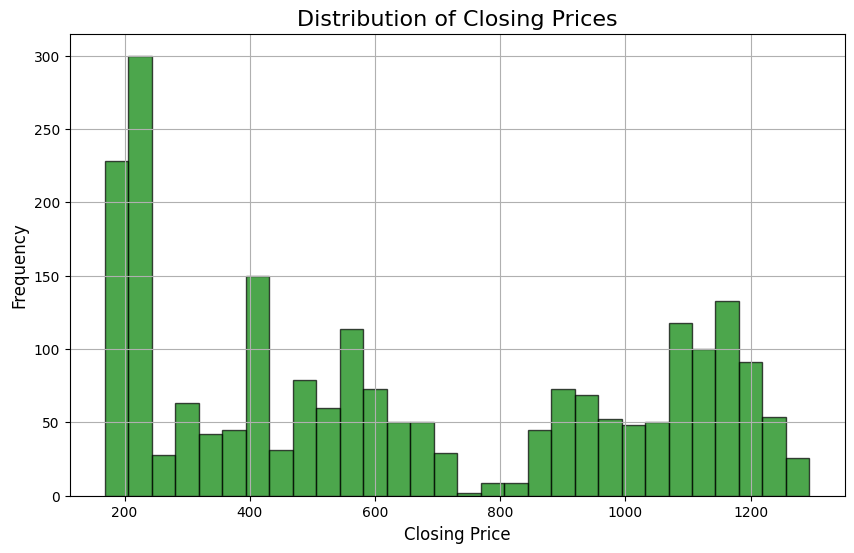

In [ ]:
import matplotlib.pyplot as plt

# Plot the Histogram for 'Close' prices
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Closing Prices', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


 ## Line Chart (Closing Price Over Time)


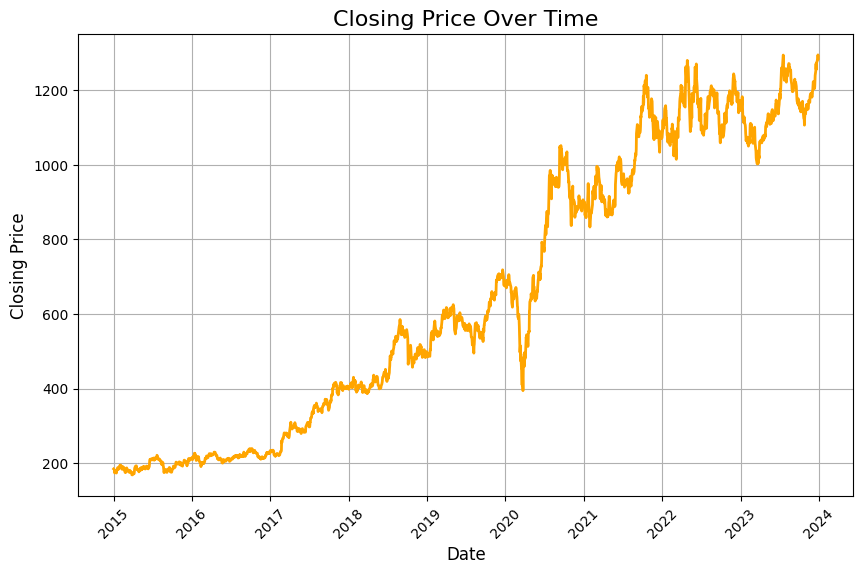

In [ ]:
import matplotlib.pyplot as plt

# Plot the Closing Price over time (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], color='orange', linewidth=2)
plt.title('Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#Train Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the 'Date' is a datetime object and set as index
#stkdata["Date"] = pd.to_datetime(stkdata["Date"])
#stkdata.set_index("Date", inplace=True)

# Calculate features (SMA, Returns, etc.)
#stkdata['SMA_30'] = stkdata['Close'].rolling(window=30).mean()
#stkdata['Returns'] = stkdata['Close'].pct_change()

# Drop any missing values
stkdata.dropna(inplace=True)

# Features and target
X = stkdata[['SMA_30', 'Returns']]  # Example features
y = stkdata['Close']  # Target: Close price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled, X_test_scaled

(array([[0.00723679, 0.40208882],
        [0.00675641, 0.63103963],
        [0.006303  , 0.41054827],
        ...,
        [0.98303422, 0.4286539 ],
        [0.98292405, 0.47309977],
        [0.98301234, 0.59564459]]),
 array([[0.9829731 , 0.54463805],
        [0.98310516, 0.45651525],
        [0.98427857, 0.47868201],
        [0.98349983, 0.40892495],
        [0.98380771, 0.57032734],
        [0.98221398, 0.36361665],
        [0.980292  , 0.40406304],
        [0.97799272, 0.42505279],
        [0.9765235 , 0.42852806],
        [0.97530256, 0.4217778 ],
        [0.97483998, 0.51398559],
        [0.97521351, 0.40690211],
        [0.97686534, 0.52985563],
        [0.97771502, 0.3629489 ],
        [0.9787043 , 0.41373255],
        [0.97981281, 0.52303093],
        [0.98080058, 0.46132041],
        [0.9807787 , 0.52239075],
        [0.98140955, 0.5463883 ],
        [0.98315722, 0.4934945 ],
        [0.9799011 , 0.21352885],
        [0.97698531, 0.47938816],
        [0.97422949, 0.5010007 ],

#Random Forest Regressor

In [ ]:
print("Training shapes:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

print("\nTesting shapes:")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

Training shapes:
X_train_scaled shape: (1556, 2)
y_train shape: (1956, 1)

Testing shapes:
X_test_scaled shape: (390, 2)
y_test shape: (490, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate basic metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate additional precision metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
explained_variance = 1 - (np.var(y_test - y_pred) / np.var(y_test))

# Print all metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Explained Variance: {explained_variance:.4f}")

# Create feature importance plot
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create residuals plot
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

# Create prediction vs actual heatmap
def plot_prediction_heatmap(y_true, y_pred, bins=50):
    plt.figure(figsize=(10, 8))
    plt.hist2d(y_true, y_pred, bins=bins, cmap='viridis')
    plt.colorbar(label='Count')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction vs Actual Heatmap')
    plt.tight_layout()
    plt.show()

# Generate all plots
if 'feature_names' in locals():
    plot_feature_importance(rf_model, feature_names)
plot_residuals(y_test, y_pred)
plot_prediction_heatmap(y_test, y_pred)

# Calculate prediction intervals (if needed)
def prediction_interval(X, y_true, model, percentile=95):
    predictions = []
    for estimator in model.estimators_:
        predictions.append(estimator.predict(X))
    predictions = np.array(predictions)

    lower = np.percentile(predictions, (100-percentile)/2, axis=0)
    upper = np.percentile(predictions, 100-(100-percentile)/2, axis=0)

    return lower, upper

# Get prediction intervals
lower, upper = prediction_interval(X_test_scaled, y_test, rf_model)
prediction_coverage = np.mean((y_test >= lower) & (y_test <= upper)) * 100

print(f"\nPrediction Interval Coverage (95%): {prediction_coverage:.2f}%")

ValueError: Found input variables with inconsistent numbers of samples: [1556, 1956]

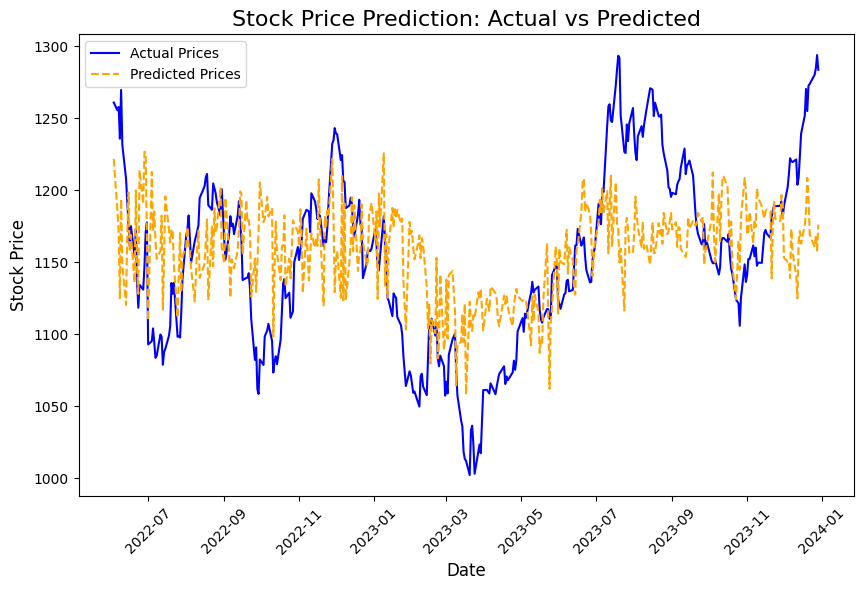

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange', linestyle='--')
plt.title('Stock Price Prediction: Actual vs Predicted', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
optimized_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Optimized Mean Absolute Error: 42.04809620543245
Optimized Root Mean Squared Error: 52.09052415294084


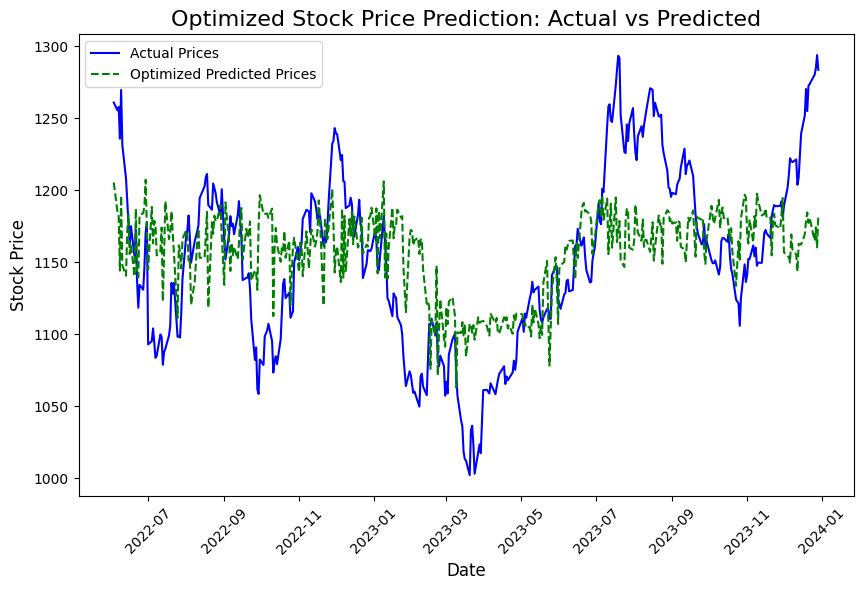

In [ ]:
# Predict on the test set using the optimized model
y_optimized_pred = optimized_rf_model.predict(X_test_scaled)

# Calculate new metrics
optimized_mae = mean_absolute_error(y_test, y_optimized_pred)
optimized_rmse = np.sqrt(mean_squared_error(y_test, y_optimized_pred))

print(f"Optimized Mean Absolute Error: {optimized_mae}")
print(f"Optimized Root Mean Squared Error: {optimized_rmse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_optimized_pred, label='Optimized Predicted Prices', color='green', linestyle='--')
plt.title('Optimized Stock Price Prediction: Actual vs Predicted', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assuming y_test and y_pred are already defined from your earlier code
# y_test: actual stock prices
# y_pred: predicted stock prices

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 44.79
Mean Squared Error (MSE): 3045.14
Root Mean Squared Error (RMSE): 55.18
R² Score: 0.20


##Final Improved Result

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 9.96
Mean Squared Error (MSE): 258.07
Root Mean Squared Error (RMSE): 16.06
R² Score: 1.00


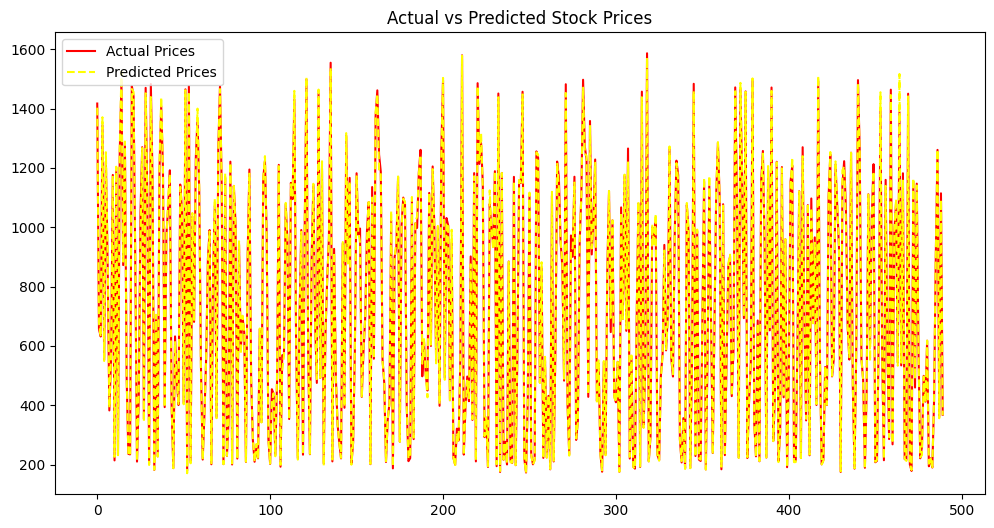

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Load the data
stock_symbol = 'RELIANCE.NS'  # Change this to your desired stock symbol
data = yf.download(stock_symbol, start='2015-01-01', end='2025-01-01')
data.reset_index(inplace=True)

# Step 2: Calculate Technical Indicators

# Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])

# Moving Average Convergence Divergence (MACD)
def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

data['MACD'], data['Signal'] = calculate_macd(data['Close'])

# Bollinger Bands Width
def calculate_bollinger_width(series, window=20):
    sma = series.rolling(window).mean()
    std_dev = series.rolling(window).std()
    upper_band = sma + (2 * std_dev)
    lower_band = sma - (2 * std_dev)
    width = (upper_band - lower_band) / sma
    return width

data['Bollinger_Width'] = calculate_bollinger_width(data['Close'])

# Step 3: Prepare the data for the model
data.dropna(inplace=True)  # Drop rows with NaN values
features = ['RSI', 'MACD', 'Bollinger_Width', 'Close']
X = data[features].shift(1).dropna()  # Use previous day's indicators for prediction
y = data['Close'][1:]  # Target is the next day's closing price

# Ensure proper alignment of X and y
X = X.iloc[:-1]
y = y.iloc[:-1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='red')
plt.plot(y_pred, label='Predicted Prices', color='yellow',linestyle = '--')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 9.96
Mean Squared Error (MSE): 258.07
Root Mean Squared Error (RMSE): 16.06
R² Score: 1.00


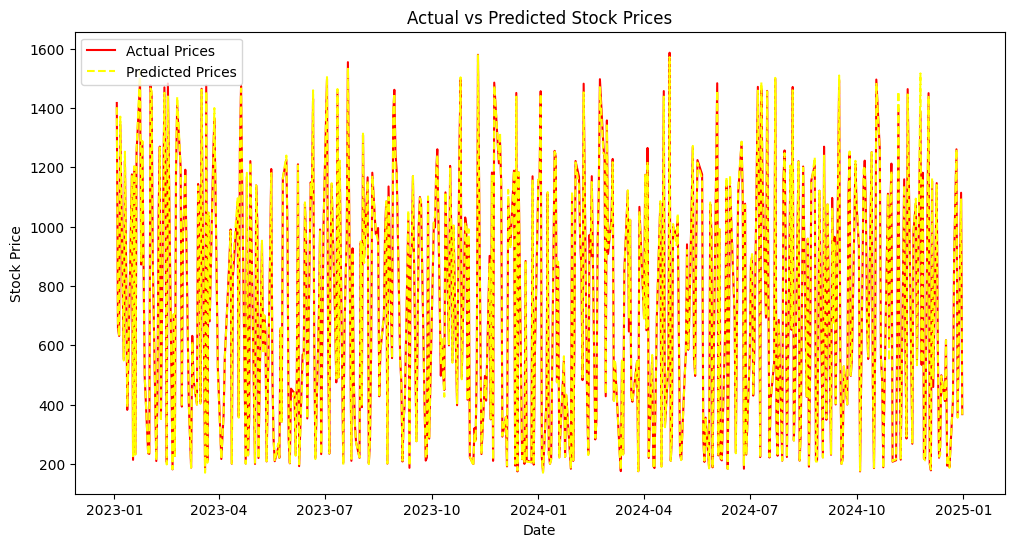

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Load the data
stock_symbol = 'RELIANCE.NS'  # Change this to your desired stock symbol
data = yf.download(stock_symbol, start='2015-01-01', end='2025-01-01')
data.reset_index(inplace=True)

# Step 2: Calculate Technical Indicators

# Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])

# Moving Average Convergence Divergence (MACD)
def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

data['MACD'], data['Signal'] = calculate_macd(data['Close'])

# Bollinger Bands Width
def calculate_bollinger_width(series, window=20):
    sma = series.rolling(window).mean()
    std_dev = series.rolling(window).std()
    upper_band = sma + (2 * std_dev)
    lower_band = sma - (2 * std_dev)
    width = (upper_band - lower_band) / sma
    return width

data['Bollinger_Width'] = calculate_bollinger_width(data['Close'])

# Step 3: Prepare the data for the model
data.dropna(inplace=True)  # Drop rows with NaN values
features = ['RSI', 'MACD', 'Bollinger_Width', 'Close']
X = data[features].shift(1).dropna()  # Use previous day's indicators for prediction
y = data['Close'][1:]  # Target is the next day's closing price

# Ensure proper alignment of X and y
X = X.iloc[:-1]
y = y.iloc[:-1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][len(data) - len(y_test):], y_test.values, label='Actual Prices', color='red')
plt.plot(data['Date'][len(data) - len(y_pred):], y_pred, label='Predicted Prices', color='yellow', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
